In [6]:
exp_variable = '10'

if exp_variable:
    print('ahi')

ahi


P(x<20): 0.150
P(x<40): 0.635
P(x<60): 1.000


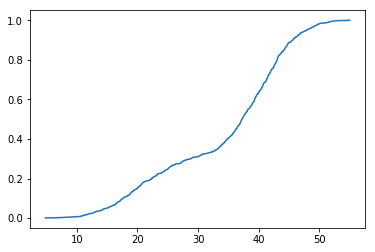

In [2]:
%matplotlib inline
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit a cdf
ecdf = ECDF(sample)
# get cumulative probability for values
print('P(x<20): %.3f' % ecdf(20))
print('P(x<40): %.3f' % ecdf(40))
print('P(x<60): %.3f' % ecdf(60))
# plot the cdf
pyplot.plot(ecdf.x, ecdf.y)
pyplot.show()

In [4]:
sample1

array([23.1213967 , 17.21045862, 25.38756433, 17.68057473, 23.33961046,
       16.41723589, 15.28337112, 22.87572813, 20.51776938, 13.8558211 ,
       11.95272264, 14.78977433, 25.63312424, 11.70466124, 28.09103267,
       19.32189298, 14.39284602, 17.18070927, 24.42076307, 20.90667341,
       22.38328806, 19.08544521, 21.02090335, 25.67982309, 13.14373181,
       20.70625502, 11.14860251, 14.38785174, 25.50369589, 17.16789087,
       10.49909646, 29.95647919, 21.16622763, 26.99409844,  9.48512281,
       22.80036312, 12.53893693, 14.17733036, 23.55106139, 10.80191858,
       24.05979324, 27.04643571, 21.52806172, 19.71607842, 20.15366941,
       24.9367146 , 26.275141  , 22.47128109, 19.39247778, 20.30105834,
       25.47884286, 23.12192767, 23.34076898, 17.32892395, 24.44321003,
       27.30856771, 18.84762688, 17.78090137, 28.92701356, 28.07854616,
       12.85270995, 16.38288932, 16.84389189, 20.48148464, 36.83715104,
       12.28178437, 24.20932987, 25.34161002, 12.8769724 , 18.06

In [233]:
import pandas as pd

df = pd.read_csv('../_data/annotations/phenotype_annotation.tab', sep='\t', low_memory=False)
# len(df[df['#disease-db'] == 'ORPHA'])
df[df['reference']=='ORPHA:2430']

#disease-db  disease-identifier             disease-name  negation  \
129876       ORPHA                2430  Congenital macroglossia       NaN   
129877       ORPHA                2430  Congenital macroglossia       NaN   
129878       ORPHA                2430  Congenital macroglossia       NaN   
129879       ORPHA                2430  Congenital macroglossia       NaN   

            HPO-ID   reference evidence-code onset frequencyHPO modifier  \
129876  HP:0000158  ORPHA:2430           TAS   NaN   HP:0040281      NaN   
129877  HP:0000821  ORPHA:2430           TAS   NaN   HP:0040284      NaN   
129878  HP:0001067  ORPHA:2430           TAS   NaN   HP:0040284      NaN   
129879  HP:0500030  ORPHA:2430           TAS   NaN   HP:0040284      NaN   

       sub-ontology alt-names   curators frequencyRaw sex  
129876            P       NaN  orphadata            -   -  
129877            P       NaN  orphadata            -   -  
129878            P       NaN  orphadata            -   -  
129879            P       NaN  orphadata            -   -

In [232]:
df.nunique()

#disease-db               3
disease-identifier    11897
disease-name          11885
negation                  0
HPO-ID                 9251
reference             13481
evidence-code             3
onset                    12
frequencyHPO              5
modifier                 23
sub-ontology              4
alt-names               779
curators               1702
frequencyRaw            870
sex                       5
dtype: int64

In [240]:
dff = df[df['#disease-db'] == 'ORPHA'].groupby('reference').filter(lambda x: len(x) > 12)
dff.nunique()

#disease-db              1
disease-identifier    2682
disease-name          2682
negation                 0
HPO-ID                6842
reference             2682
evidence-code            1
onset                    0
frequencyHPO             5
modifier                 0
sub-ontology             2
alt-names                0
curators                 1
frequencyRaw             1
sex                      1
dtype: int64

In [241]:
len(dff)

79535

In [228]:
dff = df[df['#disease-db'] == 'ORPHA'].groupby('reference')['frequencyHPO'].filter(lambda x: len(x=='HP:0040280') > 14)
dff

106074    HP:0040283
106075    HP:0040281
106076    HP:0040283
106077    HP:0040282
106078    HP:0040283
106079    HP:0040282
106080    HP:0040283
106081    HP:0040282
106082    HP:0040282
106083    HP:0040283
106084    HP:0040282
106085    HP:0040282
106086    HP:0040282
106087    HP:0040282
106088    HP:0040283
106089    HP:0040282
106090    HP:0040282
106091    HP:0040282
106092    HP:0040282
106093    HP:0040283
106094    HP:0040282
106095    HP:0040283
106096    HP:0040283
106097    HP:0040282
106098    HP:0040282
106099    HP:0040281
106100    HP:0040281
106101    HP:0040281
106102    HP:0040283
106103    HP:0040283
             ...    
195117    HP:0040282
195118    HP:0040282
195119    HP:0040281
195120    HP:0040281
195121    HP:0040282
195122    HP:0040281
195123    HP:0040283
195124    HP:0040283
195125    HP:0040282
195126    HP:0040281
195127    HP:0040282
195128    HP:0040282
195129    HP:0040281
195130    HP:0040281
195142    HP:0040282
195143    HP:0040282
195144    HP:

In [227]:
dff.nunique()

5

In [219]:
dff= df[df['#disease-db'] == 'ORPHA'].groupby('reference').filter(
    lambda x: x['frequencyHPO'].count() > 10
)
dff[dff['#disease-db'] == 'ORPHA'].groupby('reference')['frequencyHPO'].value_counts()

KeyError: False

In [164]:
df[df['#disease-db'] == 'ORPHA'].groupby('reference')

## Plot results

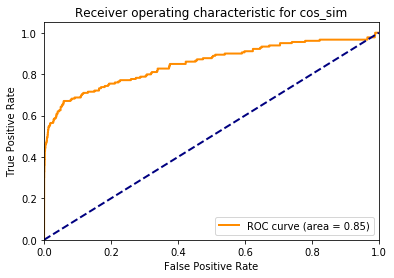

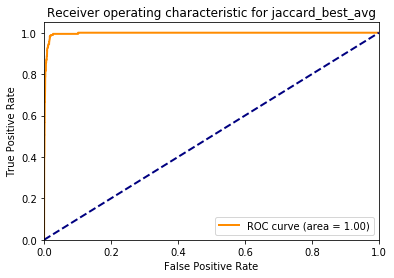

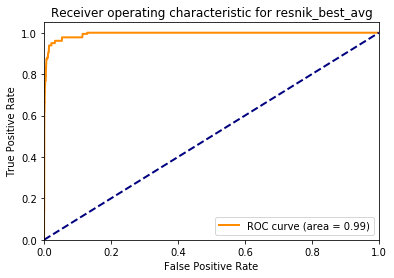

In [4]:
%matplotlib inline

import pickle
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


def load_object(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file)

# fn = '../_data/patient_similarities/patient_similarities.pkl'
fn = '../_data/patients/decipher_patient_sims.pkl'

patient_similarities = load_object(fn)
# patient_similarities
    
fl = '../_data/patients/decipher_patients_disease.pkl'

patients_disease = load_object(fl)

y = []
cos_sim = []
jaccard_best_avg = []
resnik_best_avg = []

x = len(patient_similarities)
z = x-1
"""  Why is m = x*z / 2 instead of z*z/2  ??????
"""
m = x*z/2

def plot_results(sim_name, sim_array, m):
    if m != (len(sim_array)+1): return
    else:
        fpr, tpr, thresholds = roc_curve(y, sim_array)
        roc_auc = roc_auc_score(y, sim_array)

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for {}'.format(sim))
        plt.legend(loc="lower right")
        plt.show()

def append_similarity_score(score_array, score_dict):
    for patient_compared in score_dict:
        score_array.append(score_dict[patient_compared])
    return score_array

for patient in patient_similarities:
    for sim in patient_similarities[patient]:
        if sim =='cos_sim':
            for patient_compared in patient_similarities[patient][sim]:
                cos_sim.append(patient_similarities[patient][sim][patient_compared])            
                if patients_disease[patient_compared] == patients_disease[patient]:
                    y.append(1)
                else:
                    y.append(0)
            plot_results(sim, cos_sim, m)
        if sim == 'jaccard_best_avg':
            jaccard_best_avg = append_similarity_score(jaccard_best_avg, patient_similarities[patient][sim])
            plot_results(sim, jaccard_best_avg, m)
        if sim == 'resnik_best_avg':
            resnik_best_avg = append_similarity_score(resnik_best_avg, patient_similarities[patient][sim]) 
            plot_results(sim, resnik_best_avg, m)